In [104]:
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.discriminant_analysis import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("./datasets/heart.csv")
categorical_columns = ['thal','slope','chest_pain']
y = df["output"]
X = df.drop('output',axis=1)
mlp_preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), X.columns.drop(categorical_columns)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    ]
)
columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

dt = make_pipeline(
    mlp_preprocessor,
    DecisionTreeClassifier(random_state=42)
    )

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# displaying the test accuracy
display("The test accuracy score of Decision Tree is ",
      accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro'))
dt = dt[-1]
# instantiating the object
rf = make_pipeline(
    mlp_preprocessor,
    RandomForestClassifier()
    )

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = rf.predict(X_test)

# displaying the test accuracy
display("The test accuracy score of Random Forest is ",
      accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro'))
rf = rf[-1]

# instantiate the classifier
xgb_classifier =make_pipeline(
    mlp_preprocessor,
    xgboost.XGBClassifier(n_estimators=50, random_state=42)
    ) 

# fitting the model
xgb_classifier.fit(X_train, y_train)

# predicting values
y_pred = xgb_classifier.predict(X_test)
display("The test accuracy score of Gradient Boosting Classifier is ",
      accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro'))
xgb_classifier = xgb_classifier[-1]

# instantiating the object and fitting
svm = make_pipeline(
    mlp_preprocessor,
    SVC(random_state=42)
    ).fit(X_train, y_train)

# predicting the values
y_pred = svm.predict(X_test)

# displaying the test accuracy
display("The test accuracy score of SVM is ", accuracy_score(
    y_test, y_pred), f1_score(y_test, y_pred, average='macro'))

perm_importance = permutation_importance(
    svm, X_test, y_test, n_repeats=30, random_state=42)
svm = svm[-1]

# Get feature importances
rf_importances = rf.feature_importances_
xgb_importances = xgb_classifier.feature_importances_
svm_importances = perm_importance

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': columns,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances,
    'svm': svm_importances.importances_mean,

})
display(feature_importances)


'The test accuracy score of Decision Tree is '

0.8360655737704918

0.8349567099567099

'The test accuracy score of Random Forest is '

0.8688524590163934

0.8685344827586207

'The test accuracy score of Gradient Boosting Classifier is '

0.819672131147541

0.81889338731444

'The test accuracy score of SVM is '

0.8360655737704918

0.8338779956427016

,Feature,RandomForest,XGBoost,svm
0,age,0.065898,0.035144,-7.650273e-03
1,sex,0.026910,0.037571,1.092896e-02
2,chest_pain,0.079751,0.035872,4.535519e-02
3,resting blood pressure,0.070688,0.023077,4.371585e-03
4,cholestoral,0.007504,0.027297,-2.021858e-02
5,fasting_blood_sugar,0.021378,0.034175,4.371585e-03
6,resting_electrocardiographic,0.129801,0.040913,0.000000e+00
7,maximum_heart_rate,0.055499,0.098302,-1.420765e-02
8,exercise_induced_angina,0.119832,0.064693,1.256831e-02
9,ST_depression,0.131888,0.129882,1.147541e-02


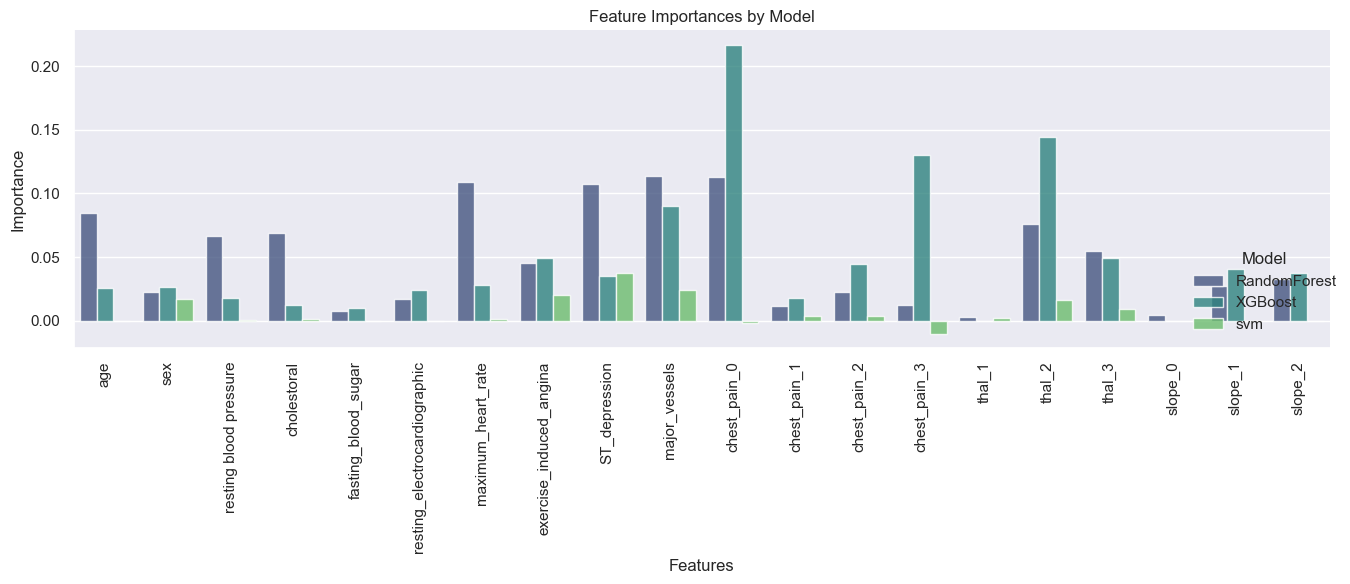

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# Melt the DataFrame for easy plotting
melted = feature_importances.melt(id_vars='Feature', var_name='Model', value_name='Importance')

# Create a grid plot using Seaborn
grid_plot = sns.catplot(
    data=melted, kind='bar',
    x='Feature', y='Importance', hue='Model',
    palette='viridis', alpha=0.8, height=6, aspect=2
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set plot title and labels
plt.title('Feature Importances by Model')
plt.xlabel('Features')
plt.ylabel('Importance')

# Show the plot
plt.tight_layout()
plt.show()

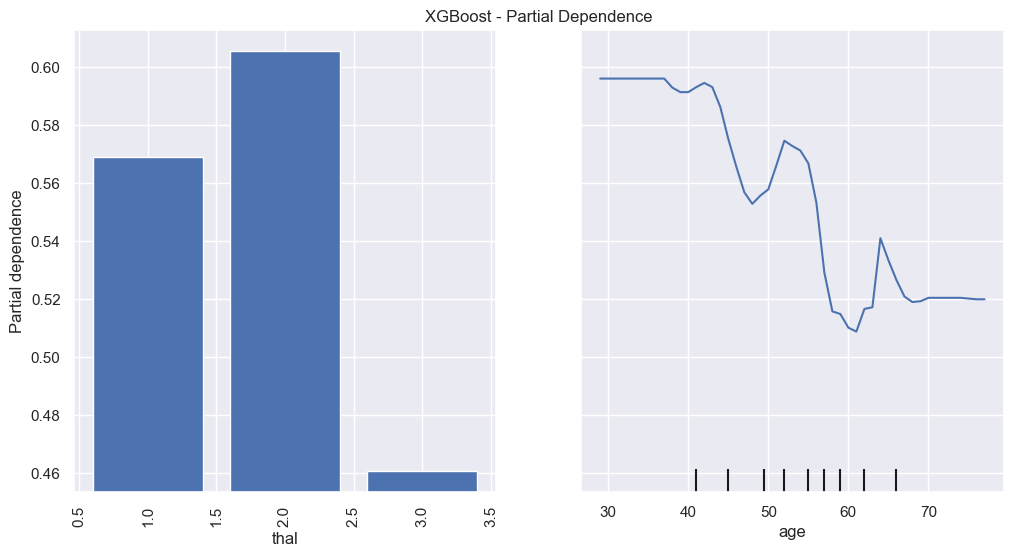

In [94]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
feature_names = [0, 1, 2, 3]

# Decision Tree
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("XGBoost - Partial Dependence")
PartialDependenceDisplay.from_estimator(dt, X_train, features=["thal","age"], ax=ax,categorical_features=["thal"])
plt.show()


